<a href="https://colab.research.google.com/github/jsebastiants/Telcom_churn/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telecom_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

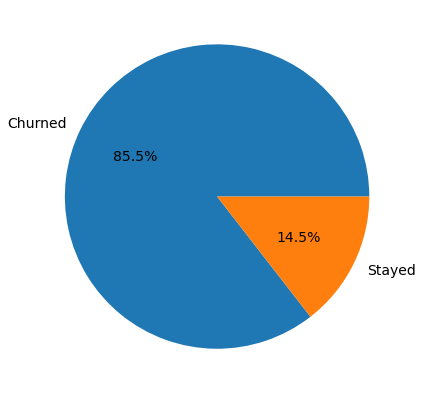

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df['Churn'].value_counts( sort = True), labels=['Churned', 'Stayed'], autopct='%1.1f%%', textprops= {'fontsize':14})
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d7dfbb4d0>,
      dtype=object)

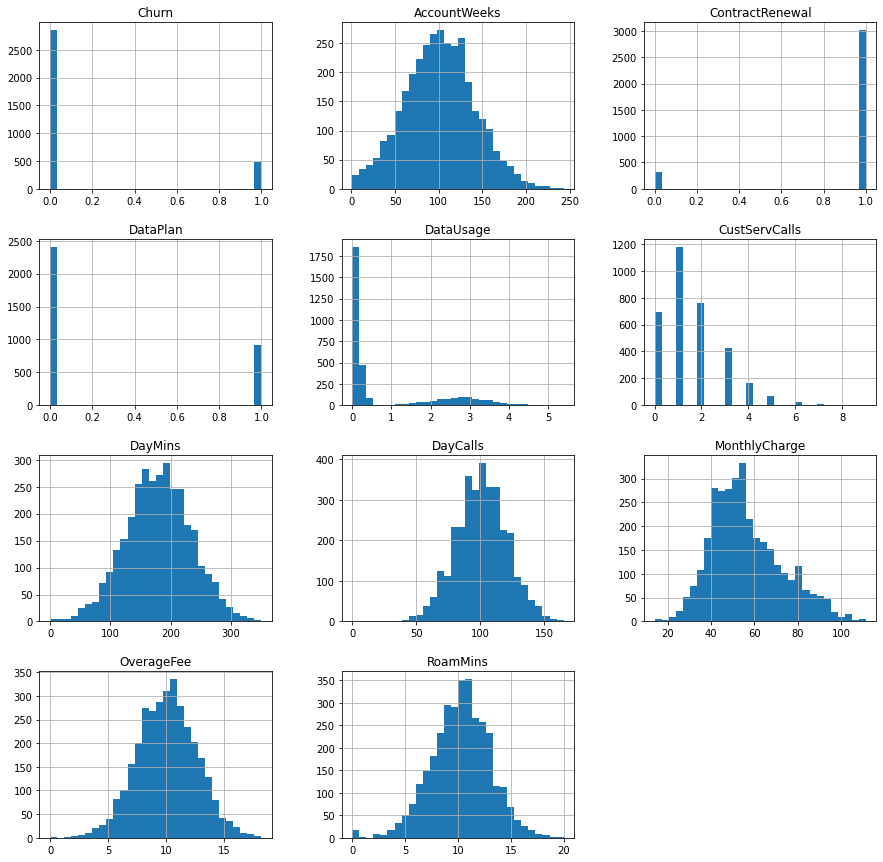

In [ ]:
df.hist(figsize=(15,15), bins= 30)

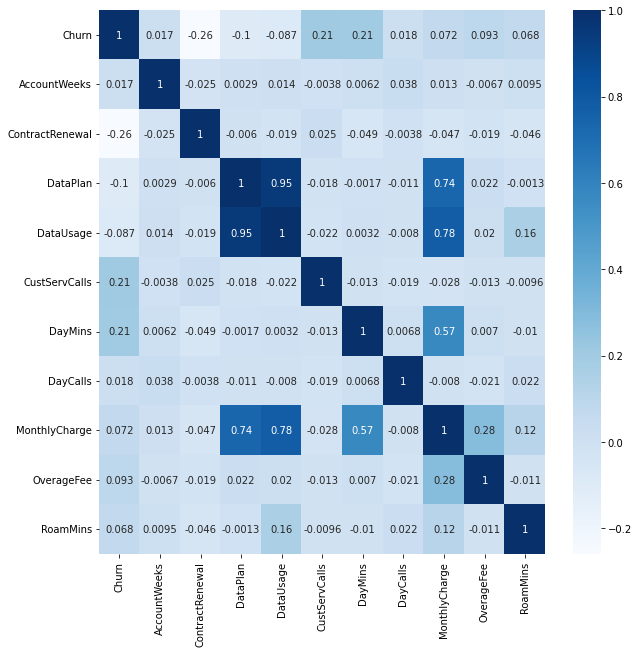

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap= 'Blues')

Existe un alto grado de correlación de la columna 'Churn' con 'DayMins', 'CustServCalls' y 'ContractRenewal'.
Las columnas 'DataPlan', 'DataUsage' y 'MonthlyCharge' también están altamente correlacionadas. El consejo común es deshacerse de una de las características correlacionadas, pero es mejor hacerlo después de ajustar el modelo y verificar la importancia de la característica. Por lo tanto, no vamos a eliminar ninguna de las funciones correlacionadas ahora.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Engineering

Como vemos números tan grandes y pequeños en el dataset vamos a estandarizarlos como parte del prepocesamiento

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.81498972,  0.32388048, -0.61444668, ..., -0.07520216,
        -0.03472422, -0.29709755],
       [ 0.76425984,  0.32388048,  1.62748051, ...,  0.74902185,
         0.6321183 , -0.29709755],
       [-0.33870811,  0.32388048,  1.62748051, ...,  0.21389134,
         0.45850249, -0.26121768],
       ...,
       [-0.86512463,  0.32388048, -0.61444668, ..., -0.97323726,
         1.20031547, -0.3688573 ],
       [ 1.71682307,  0.32388048, -0.61444668, ..., -0.62878544,
        -0.51216768, -0.11769819],
       [-1.61714823,  0.32388048,  1.62748051, ..., -0.98553911,
        -1.41970484, -0.58413653]])

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.27279233,  0.3350143 , -0.62642243, ..., -0.08790331,
         2.55851252,  1.15848864],
       [-0.8877333 ,  0.3350143 , -0.62642243, ..., -1.10258963,
         0.32780258,  0.9084995 ],
       [-0.10563994,  0.3350143 , -0.62642243, ..., -2.53508797,
        -0.8111995 , -1.23426457],
       ...,
       [-0.6102163 ,  0.3350143 , -0.62642243, ..., -1.34133935,
         0.27656719,  0.19424481],
       [-0.96341975,  0.3350143 , -0.62642243, ..., -0.98321477,
        -0.70478754,  0.72993583],
       [ 0.97919923,  0.3350143 , -0.62642243, ...,  0.32990871,
         0.658862  , -1.51996645]])

## Decision tree

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       940
           1       0.92      0.49      0.64       160

    accuracy                           0.92      1100
   macro avg       0.92      0.74      0.80      1100
weighted avg       0.92      0.92      0.91      1100



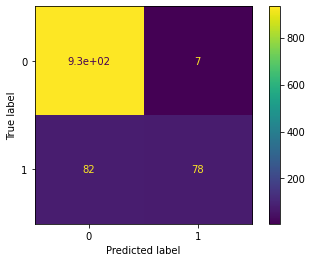

In [ ]:
clfd = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=3)
clfd.fit(X_train, y_train)
pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test)

## Random forest

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.90      0.64      0.75       160

    accuracy                           0.94      1100
   macro avg       0.92      0.81      0.86      1100
weighted avg       0.94      0.94      0.93      1100



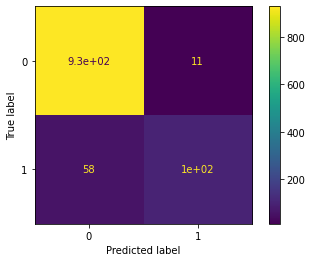

In [ ]:
clfr = RandomForestClassifier(n_estimators=100, random_state=42)
clfr.fit(X_train, y_train)
pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.83      0.66      0.74       160

    accuracy                           0.93      1100
   macro avg       0.89      0.82      0.85      1100
weighted avg       0.93      0.93      0.93      1100



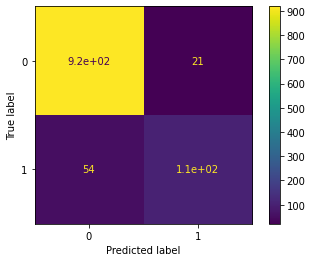

In [ ]:
clfg = GradientBoostingClassifier(n_estimators=300, max_depth=2, random_state=42)
clfg.fit(X_train, y_train)
pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test)

## KNN

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       940
           1       0.76      0.39      0.51       160

    accuracy                           0.89      1100
   macro avg       0.83      0.68      0.73      1100
weighted avg       0.88      0.89      0.88      1100



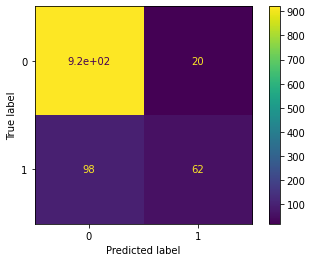

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

## AUC ROC

In [ ]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8760405585106382 0.9292719414893617 0.9157380319148936 0.8756183510638298


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

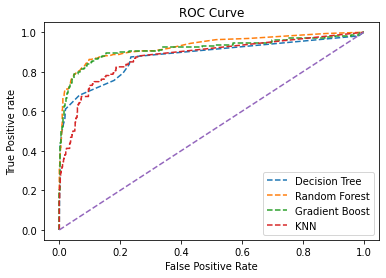

In [ ]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Modelos de aprendizaje automático
Random Forest, Gradientboost son los mejores.
Gradientboost, árbol de decisión, KNN son hiperparámetros ajustados. El bosque aleatorio no está ajustado por hiperparámetros.

Pasos para retener clientes
Más llamadas de servicio al cliente significan que el cliente es más propenso a abandonar.
Presente un plan de datos a los clientes que utilizan datos sin planes de datos lo antes posible. La posible optimización del precio de los planes de datos puede retener a los clientes.